<a href="https://colab.research.google.com/github/sanejhansi/Powerpoint-Point-Controller-Using-Gestures/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (32, 32, 3)  # CIFAR-10 images are 32x32 with 3 color channels (RGB)

# Encoder
inputs = Input(shape=input_shape)

# Encoder Layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Flatten and bottleneck
x = Flatten()(x)
x = Dense(512, activation='relu')(x)  # Bottleneck layer
encoded = Dense(8 * 8 * 128, activation='relu')(x)  # Compressed representation

# Reshape to the size of the feature maps
x = Reshape((8, 8, 128))(encoded)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Output layer
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Reconstruct the image

# Create the autoencoder model
autoencoder = Model(inputs, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8192)                │       4,202,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,585,539 (21.31 MB)

 Trainable params: 5,585,539 (21.31 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow.keras as keras
from tensorflow.keras import layers,models
from tensorflow.keras import backend as K
encoder_input=layers.Input(shape=(32,32,1),name="encoder_input")
x=layers.Conv2D(filters=32,kernel_size=(3,3),strides=2,activation='relu',padding="same")(encoder_input)
x=layers.Conv2D(filters=64,kernel_size=(3,3),strides=2,activation='relu',padding="same")(x)
x=layers.Conv2D(filters=128,kernel_size=(3,3),strides=2,activation='relu',padding="same")(x)
shape_before_flattening=K.int_shape(x)[1:]
x=layers.Flatten()(x)
encoder_output=layers.Dense(2,name='encoder_output')(x)
encoder=models.Model(encoder_input,encoder_output)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import tensorflow.keras as keras
from tensorflow.keras import layers,models
from tensorflow.keras import backend as K
import numpy as np # Import NumPy library

decoder_input=layers.Input(shape=(2,),name="decoder_input")
x=layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x=layers.Reshape(shape_before_flattening)(x)
x=layers.Conv2DTranspose(128,kernel_size=(3,3),strides=2,activation='relu',padding="same")(x)
x=layers.Conv2DTranspose(64,kernel_size=(3,3),strides=2,activation='relu',padding="same")(x)
x=layers.Conv2DTranspose(32,kernel_size=(3,3),strides=2,activation='relu',padding="same")(x)
decoder_output=layers.Conv2DTranspose(1,kernel_size=(3,3),strides=1,activation='sigmoid',padding="same",name="decoder_output")(x)
decoder=models.Model(decoder_input,decoder_output)
decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Conv2DTranspose)     │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder = models.Model(encoder_input, decoder(encoder_output))
autoencoder.compile(optimizer = "adam", loss = "binary_crossentorpy")

In [7]:
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
def preprocess(imgs):
    imgs=imgs.astype("float32")/255.0
    imgs = np.reshape(imgs,(len(imgs),28,28,1)) # Reshape before padding
    imgs=np.pad(imgs,((0,0),(2,2),(2,2),(0,0)),constant_values=0.0) # Pad the reshaped images
    return imgs
x_train=preprocess(x_train)
x_test=preprocess(x_test)

In [10]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=5,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test,x_test)

)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 238ms/step - loss: 0.3864 - val_loss: 0.2670
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 241ms/step - loss: 0.2640 - val_loss: 0.2596
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 238ms/step - loss: 0.2579 - val_loss: 0.2559
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 239ms/step - loss: 0.2545 - val_loss: 0.2546
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 239ms/step - loss: 0.2520 - val_loss: 0.2530


In [9]:
autoencoder = models.Model(encoder_input, decoder(encoder_output))
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy") # Fix typo in loss function name

In [11]:
example_images=x_test[:5000]
predictions=autoencoder.predict(example_images)
predictions.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


(5000, 32, 32, 1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(5000, 2)

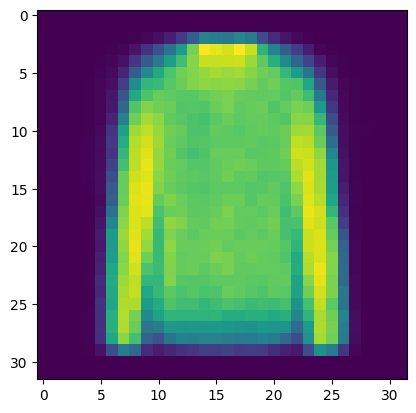

In [15]:
plt.imshow(predictions[10])
embeddings=encoder.predict(example_images)
embeddings.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


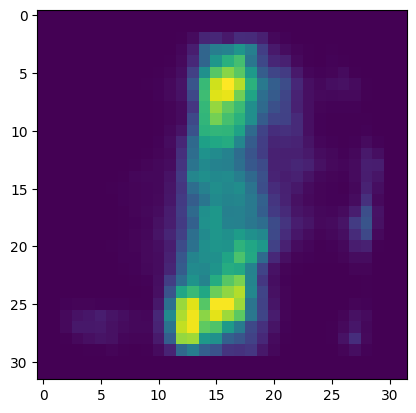

In [16]:
mins, maxs =  np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins,maxs,size=(1,2)) #Fixed typo randon to random
reconstructions=decoder.predict(sample)
plt.imshow(reconstructions[0,:,:,:])